# HILLARY CLINTON - BERNIE SANDERS WORD NETWORKS: Word Co-Occurrences in Sentences of the Campaign Launch Speeches in Spring 2015 

## By Moses Boudourides, Sergios Lenis & Pantelis Vikatos


**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets](https://github.com/mboudour/WordNets)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [1]:
# All these imports are needed for the following cells to run

import nltk
import os
import re
# import csv
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize
import networkx as nx
import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse, Polygon
import numpy as np
# import math
# import random
import codecs
from textblob import TextBlob
import pandas as pd
%matplotlib inline 
%load_ext autoreload

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


* The transcript of Hillary Clinton’s Campaign Launch Speech on 6-12-2015 was downloaded from http://time.com/3920332/transcript-full-text-hillary-clinton-campaign-launch/ (accessed on 3-19-2016)
* The transcript of Bernie Sanders' Campaign Launch Speech on 5-26-2015 was downloaded from https://berniesanders.com/bernies-announcement/ (accessed on 3-19-2016)

In [2]:
# Opening and reading the two speeches in NLTK

f1 = codecs.open('HillaryClintonCampaignLaunch6-12-2015.txt', "r", encoding="utf-8")
f2 = codecs.open('BernieSandersCampaignLaunch5-26-2015.txt', "r", encoding="utf-8")
f1Temp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
f2Temp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
f1Temp.write('HillaryClintonCampaignLaunch6-12-2015.txt')
f2Temp.write('BernieSandersCampaignLaunch5-26-2015.txt')
HClinton=f1.read()
BSanders=f2.read()

In [3]:
# Noun phrases are extracted from the two speeches using TextBlob

blobHClinton = TextBlob(HClinton)
blobBSanders = TextBlob(BSanders)
nounHC=blobHClinton.np_counts
nounBS = blobBSanders.np_counts

dfnp1=pd.DataFrame(columns=["H Clinton's noun phrases", "Frequencies"])
dfnp2=pd.DataFrame(columns=["B Sanders' noun phrases", "Frequencies"])
u=1
for l in nounHC: 
    dfnp1.loc[u]=[l,nounHC[l]]
    u+=1
u=1
for l in nounBS: 
    dfnp2.loc[u]=[l,nounBS[l]]                  
    u+=1

print "The total number of noun phrases in H Clinton's speech is", len(nounHC)
dfnp1.head(5)
# To see all the noun phrases in H Clinton's speech just run dfnp1 above

The total number of noun phrases in H Clinton's speech is 293


,H Clinton's noun phrases,Frequencies
1,country wo n't,1
2,new generation,1
3,possible start,1
4,immigrant families,1
5,'s diversity,1


In [4]:
print "The total number of noun phrases in B Sanders' speech is", len(nounBS)
dfnp2.head(5)
# To see all the noun phrases in B Sanders' speech just run dfnp2 above

The total number of noun phrases in B Sanders' speech is 268


,B Sanders' noun phrases,Frequencies
1,worker productivity,1
2,legitimate anger,1
3,women workers,1
4,cayman,1
5,extreme weather disturbances,1


In [5]:
# Common noun phrases in H Clinton's and B Sanders speech

common={}
ncommon={}
dfc=pd.DataFrame(columns=["Common noun phrases", "H Clinton", "B Sanders"])
u=1
for l in nounHC:  
    if l in nounBS:
        common[l]=min(nounHC[l],nounBS[l])
        ncommon[l]=(nounHC[l],nounBS[l])        
        dfc.loc[u]=[l,nounHC[l],nounBS[l]]
        u+=1
dfc

,Common noun phrases,H Clinton,B Sanders
1,thank,2,1
2,political process,1,1
3,republican,2,4
4,wall street,1,1
5,income inequality,1,2
6,depression,1,1
7,jobs,1,3
8,china,1,1
9,york,2,2
10,american people,1,2


In [6]:
#The following noun phrases were removed:

to_be_removed = [u'well',u'thank',u'york']
for key in common.keys():
    if key in to_be_removed:
        del common[key]
ccommon=common.keys()

In [7]:
# This function counts co-occurrences of the common noun phrases in the sentences of a speech

def occurrences(source,terms):
    ALL_sentences=sent_tokenize(source)
    combinations_terms = list(itertools.combinations(terms,2))
    n = len(combinations_terms)
    occurlist =[]
    for i in range(1,n):
        for j in ALL_sentences:
            temp= list(combinations_terms[i])
            out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
            if out :
                occurlist.append(str(temp[0])+' - '+ str(temp[1]))
            out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
            if out2 :
                occurlist.append(str(temp[1])+' - '+ str(temp[0]))
    occurdict={}
    for i in occurlist:
        if i not in occurdict:
            occurdict[i] = 1
        else:
            occurdict[i] = occurdict[i]+1
    return occurdict

HCdict = occurrences(HClinton,ccommon)
BSdict = occurrences(BSanders,ccommon)

In [8]:
# This function constructs the graph of common noun phrases tied by their co-occurrences in sentenses of a speech

def makegraph(occurrences):
    G = nx.Graph()
    for eds,wei in occurrences.items():
        ed=eds.split(' - ')    
        G.add_edge(ed[0],ed[1],weight=wei)
        G.add_node(ed[0],label=ed[0])
        G.add_node(ed[1],label=ed[1])
    return G

GHC = makegraph(HCdict)
GBS = makegraph(BSdict)

In [9]:
print GHC.edges(data=True)

[('income inequality', 'republican', {'weight': 1}), ('america', 'health insurance', {'weight': 1}), ('america', 'jobs', {'weight': 3}), ('jobs', 'health care', {'weight': 1}), ('jobs', 'depression', {'weight': 1}), ('congress', 'health care', {'weight': 1}), ('congress', 'constitutional amendment', {'weight': 1}), ('constitutional amendment', 'supreme court', {'weight': 1}), ('health care', 'republican', {'weight': 1}), ('health care', 'depression', {'weight': 1}), ('young people', 'republican', {'weight': 1})]


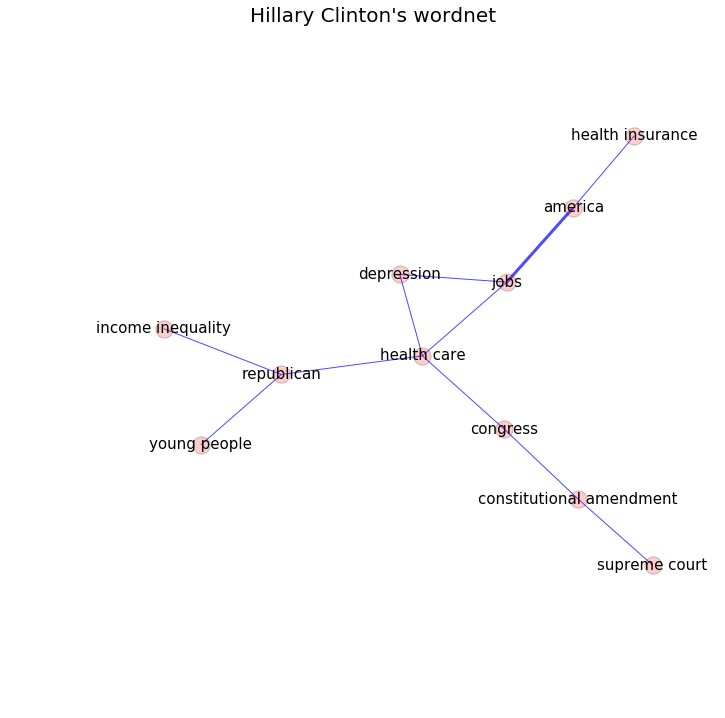

In [10]:
# Plotting the graph of common phrases in H Clinton's speech

from tools import draw_network
pos=nx.graphviz_layout(GHC)
# pos=nx.spring_layout(GHC)
sstt="Hillary Clinton's wordnet"
possit=draw_network(GHC,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15)

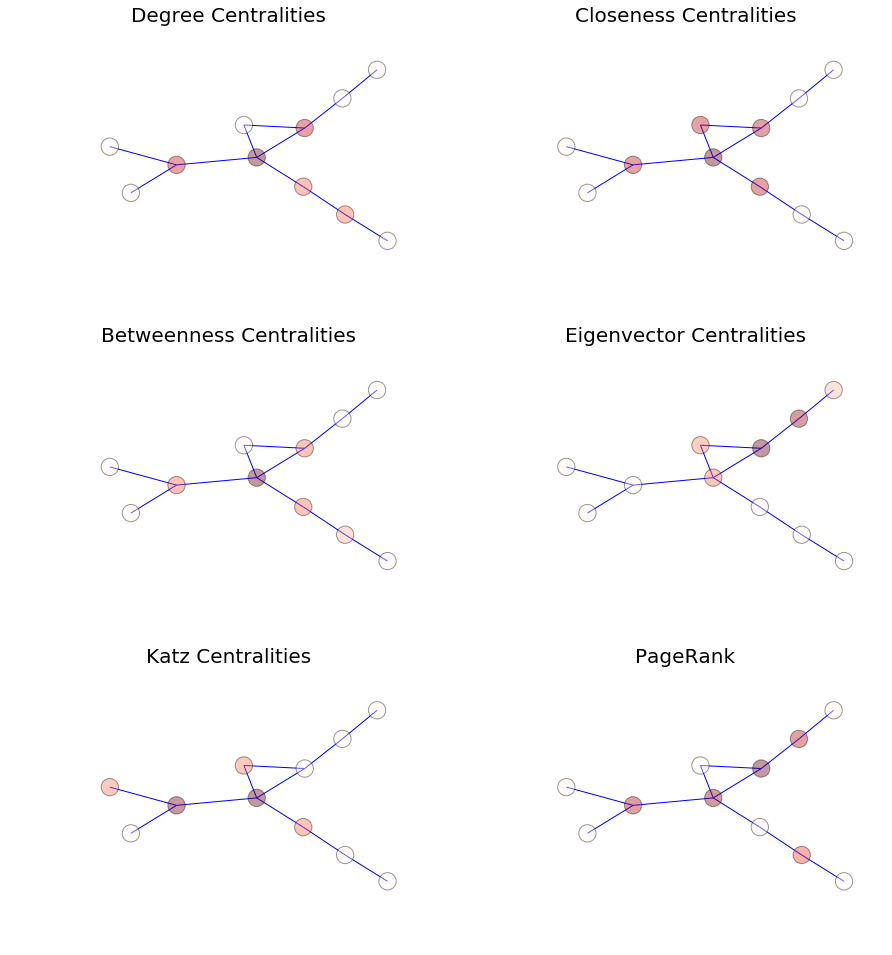

In [11]:
# Computing centralities of common phrases in the graph of H Clinton's speech

from tools import draw_centralities_subplots
centrali=draw_centralities_subplots(GHC,pos,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

In [12]:
# The table of centralities of common phrases in the graph of H Clinton's speech

dfchc=pd.DataFrame()
dfchc.insert(0,'Common Nouns',centrali[centrali.keys()[0]].keys())
u=1
for i,k in centrali.items():
    dfchc.insert(u,i,k.values())
dfchc

,Common Nouns,degree_centrality,eigenvector_centrality,page_rank,betweenness_centrality,katz_centrality,closeness_centrality
0,republican,0.3,0.592673,0.129420,0.377778,0.552924,0.434783
1,income inequality,0.1,0.164756,0.050305,0.000000,0.244827,0.312500
2,jobs,0.3,0.102548,0.154791,0.355556,0.003193,0.454545
3,congress,0.2,0.655743,0.084613,0.355556,0.274432,0.434783
4,constitutional amendment,0.2,0.028507,0.095793,0.200000,0.031633,0.333333
5,supreme court,0.1,0.094624,0.054348,0.000000,-0.072136,0.256410
6,depression,0.2,0.311879,0.070215,0.000000,0.257140,0.416667
7,health insurance,0.1,0.028507,0.040652,0.000000,-0.227488,0.263158
8,young people,0.1,0.028507,0.050305,0.000000,0.244827,0.312500
9,america,0.2,0.268990,0.127134,0.200000,-0.223866,0.344828


Number of communities of Hillary Clinton's wordnet = 4
Community partition of Hillary Clinton's wordnet:
[['income inequality', 'young people', 'republican'], ['jobs', 'america', 'health insurance'], ['congress', 'constitutional amendment', 'supreme court'], ['health care', 'depression']]
Community modularity of Hillary Clinton's wordnet = 0.4172


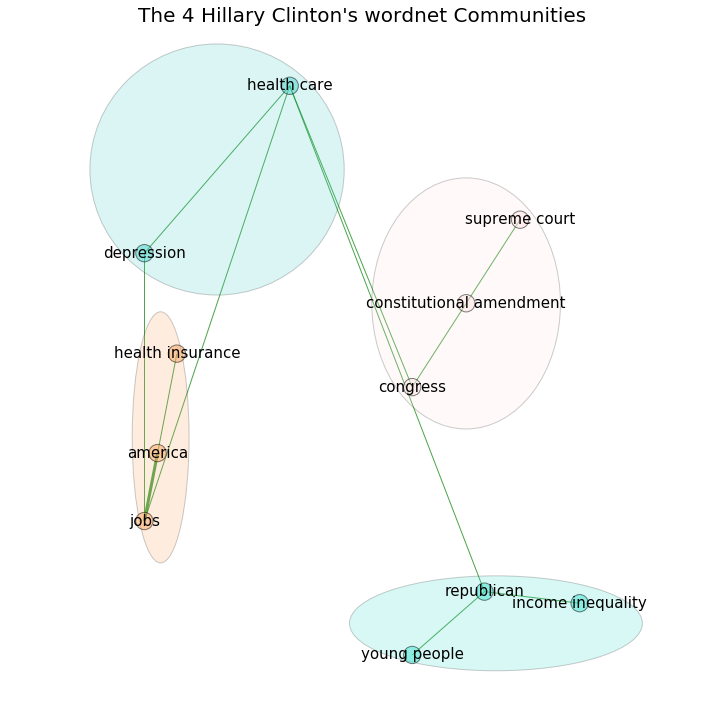

In [13]:
# Detecting communities of common phrases in the graph of H Clinton's speech

%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(GHC,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.7
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(GHC,GHC.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15,valpha=0.5)

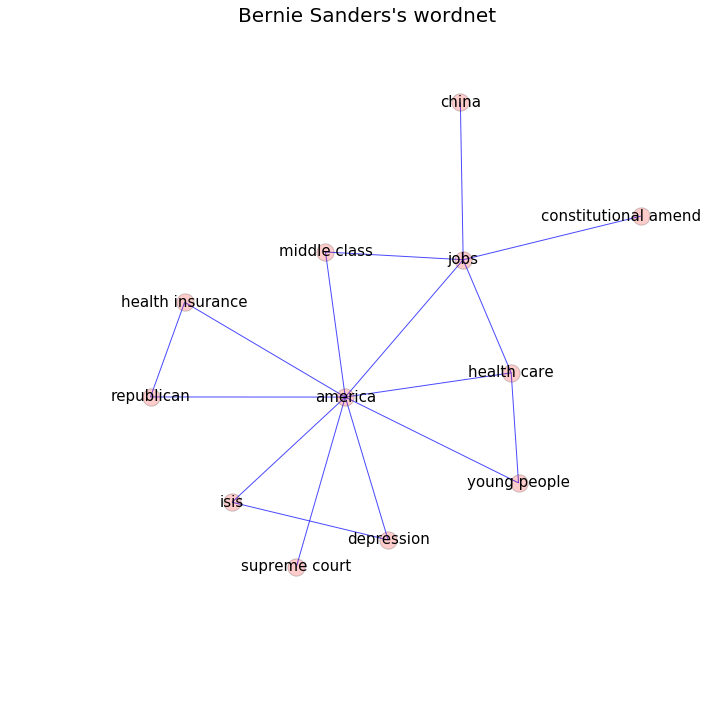

In [14]:
# Plotting the graph of common phrases in B Sanders' speech

pos=nx.graphviz_layout(GBS)
# pos=nx.spring_layout(GBS)
sstt="Bernie Sanders's wordnet"
posit=draw_network(GBS,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15)

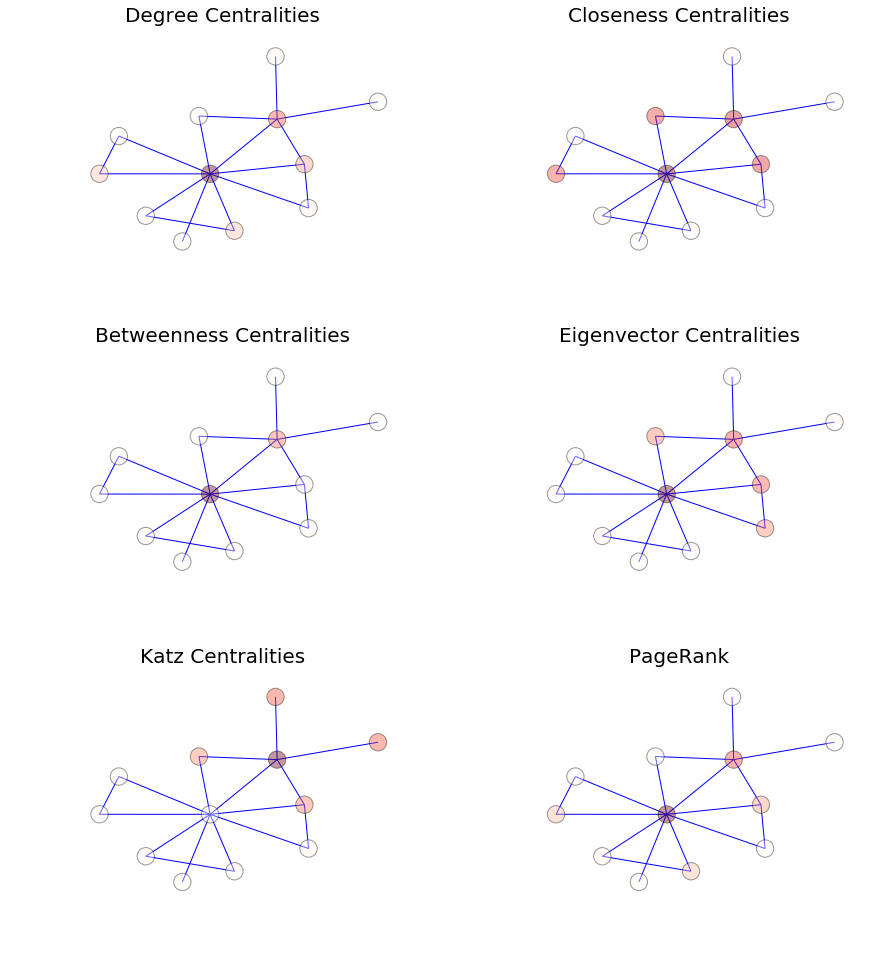

In [15]:
# Computing centralities of common phrases in the graph of B Sanders' speech

centrali=draw_centralities_subplots(GBS,pos,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

In [16]:
# The table of centralities of common phrases in the graph of B Sanders' speech

dfcbs=pd.DataFrame()
dfcbs.insert(0,'Common Nouns',centrali[centrali.keys()[0]].keys())
u=1
for i,k in centrali.items():
    dfcbs.insert(u,i,k.values())
dfcbs

,Common Nouns,degree_centrality,eigenvector_centrality,page_rank,betweenness_centrality,katz_centrality,closeness_centrality
0,republican,0.181818,0.222613,0.064130,0.000000,-0.290317,0.500000
1,jobs,0.454545,0.222613,0.155349,0.354545,0.560077,0.647059
2,constitutional amendment,0.090909,0.100658,0.038909,0.000000,0.315774,0.407407
3,supreme court,0.090909,0.376088,0.036874,0.000000,-0.113794,0.478261
4,depression,0.181818,0.251632,0.064130,0.000000,-0.290317,0.500000
5,health insurance,0.181818,0.263690,0.064130,0.000000,-0.290317,0.500000
6,china,0.090909,0.100658,0.038909,0.000000,0.315774,0.407407
7,young people,0.181818,0.222613,0.062308,0.000000,0.038201,0.500000
8,middle class,0.181818,0.222613,0.063284,0.000000,0.226751,0.550000
9,isis,0.181818,0.331038,0.064130,0.000000,-0.290317,0.500000


Number of communities of Bernie Sanders's wordnet = 3
Community partition of Bernie Sanders's wordnet:
[['america', 'supreme court', 'health insurance', 'isis', 'republican', 'depression'], ['jobs', 'constitutional amendment', 'china', 'middle class'], ['young people', 'health care']]
Community modularity of Bernie Sanders's wordnet = 0.2676


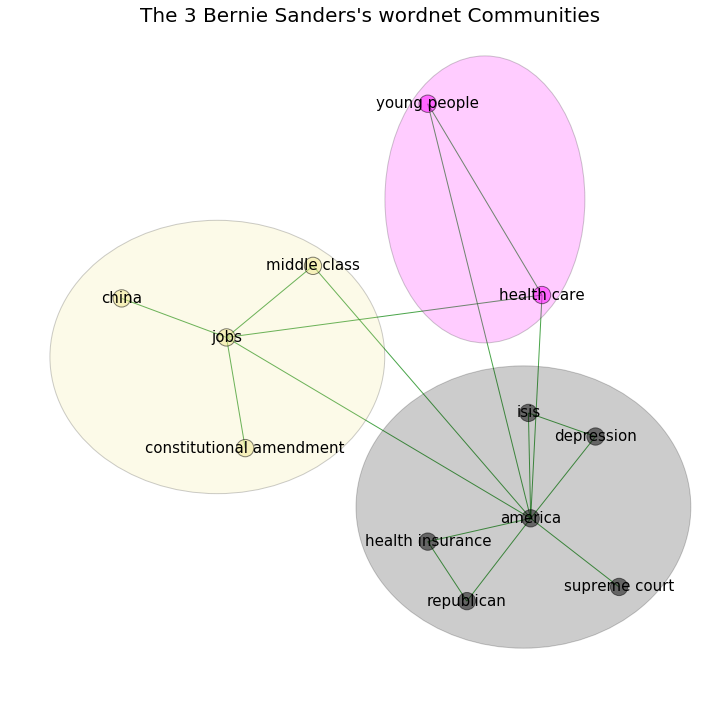

In [17]:
# Detecting communities of common phrases in the graph of B Sanders' speech

%autoreload 2
part,nodper=print_communities(GBS,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.7
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(GBS,GBS.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15,valpha=0.5)

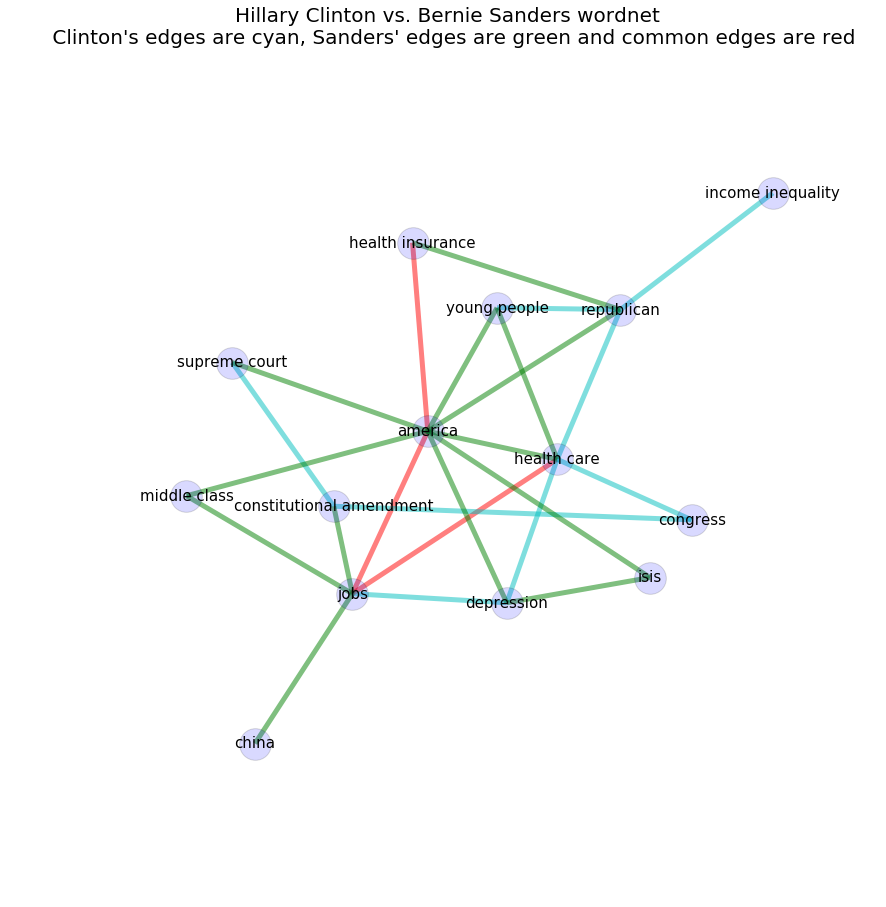

In [18]:
# Plotting the Hillary Clinton vs. Bernie Sanders wordnet

G = nx.Graph()
G.add_edges_from(GHC.edges())
G.add_edges_from(GBS.edges())
pos=nx.graphviz_layout(G)
# pos=nx.spring_layout(G)
sstt="Hillary Clinton vs. Bernie Sanders wordnet \n Clinton's edges are cyan, Sanders' edges are green and common edges are red"
plt.figure(figsize=(15,15))
common_edges=set(GHC.edges()).intersection(set(GBS.edges()))
HCandBSedges = list(common_edges)
Cedges=set(GHC.edges()).difference(set(GBS.edges()))
HCedges = list(Cedges)
Sedges=set(GBS.edges()).difference(set(GHC.edges()))
BSedges = list(Sedges)
nx.draw_networkx_nodes(G,pos,withLabels=True,node_color='b',node_size=1000,alpha=0.15)
nx.draw_networkx_edges(G,pos,edgelist=HCandBSedges,width=5,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,edgelist=HCedges,width=5,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=BSedges,width=5,alpha=0.5,edge_color='g')
nx.draw_networkx_labels(G,pos=pos,font_size=15)
plt.title(sstt,fontsize=20)
kk=plt.axis('off')